# Bay Area, CA - Airbnb Data


### Context

Since its inception in 2008, Airbnb has disrupted the hospitality industry by allowing almost anyone to rent out a spare room and host travelers looking for an overnight stay.

While Airbnb has publicly available data from many locations, **Santa Clara County is of particular interest as it is one of the major counties in the Bay Area and home to many prominent tech companies and startups in the Silicon Valley.**
As such, home prices and cost of living are exceptionally high in this area, as one will see in the data.

### Content

All data is publicly available under the Creative Commons "Public Domain Dedication" license and has been updated as of June 12th, 2020.Provided are metrics that are publicly visible for each listing (e.g. name, description, price, reviews, etc.), but the dataset contains some Airbnb's internal metrics as well (review score accuracy, host acceptance rate, etc.).

### Acknowledgements

Acknowledgments go to Airbnb for their publicly released datasets that are available at this website.

### Inspiration & ideas:

1. Create a price-suggestion model for new Airbnb hosts who might not know the value of their listing.
   - Text mining with statified house price data
2. Can we predict the rating of an Airbnb listing utilizing **NLP** of the description columns?How have Airbnb
3. prices changed over time? Are prices seasonal?
   - Time series analysis?
4. Which areas in the Santa Clara County are most "popular"?
   - Region analysis
5. Which features of an Airbnb listing are important to add to its perceived value?
   - Feature analysis,PCA
   - Correlation analysis


## Import libraries and data


In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [688]:
data = pd.read_csv('./data/Airbnb_Listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,f,f,moderate,f,t,12,12,0,0,0.08
2,17884,https://www.airbnb.com/rooms/17884,20200530151957,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...",none,"This is a very quiet family neighborhood, but ...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20200530151957,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.17
4,37512,https://www.airbnb.com/rooms/37512,20200530151957,2020-05-31,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,none,Our community is a safe environment and at nig...,...,f,f,moderate,t,t,2,0,2,0,1.53


In [689]:
data.shape

(7221, 106)

In [690]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 5.8+ MB


## Data Cleaning


### Clean missing and null values


In [691]:
# find missing values and single value columns in data:
del_cols = []

for col in data.columns:
    if data[col].isna().all():
        del_cols.append(col)
    elif data[col].nunique() == 1:
        del_cols.append(col)

In [692]:
del_cols

['scrape_id',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'neighbourhood_group_cleansed',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'license',
 'is_business_travel_ready']

In [693]:
data = data.drop(del_cols, axis=1)

In [694]:
data['id'].isna().sum()

0

In [695]:
# delete url column:
urls = [
    'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
    'host_picture_url'
]


In [696]:
data = data.drop(urls, axis=1)

In [697]:
for col in data.columns:
    list_unique = (col, len(data[col].unique()))
    print(list_unique)

('id', 7221)
('last_scraped', 2)
('name', 7078)
('summary', 6052)
('space', 4403)
('description', 6440)
('neighborhood_overview', 3509)
('notes', 2747)
('transit', 3200)
('access', 3378)
('interaction', 3166)
('house_rules', 3718)
('host_id', 3533)
('host_name', 2103)
('host_since', 2085)
('host_location', 242)
('host_about', 2030)
('host_response_time', 5)
('host_response_rate', 44)
('host_acceptance_rate', 78)
('host_is_superhost', 3)
('host_neighbourhood', 145)
('host_listings_count', 62)
('host_total_listings_count', 62)
('host_verifications', 240)
('host_has_profile_pic', 3)
('host_identity_verified', 3)
('street', 37)
('neighbourhood', 37)
('neighbourhood_cleansed', 16)
('city', 35)
('state', 5)
('zipcode', 83)
('market', 5)
('smart_location', 37)
('latitude', 5882)
('longitude', 6357)
('is_location_exact', 2)
('property_type', 28)
('room_type', 4)
('accommodates', 16)
('bathrooms', 16)
('bedrooms', 11)
('beds', 21)
('bed_type', 5)
('amenities', 6396)
('square_feet', 25)
('price'

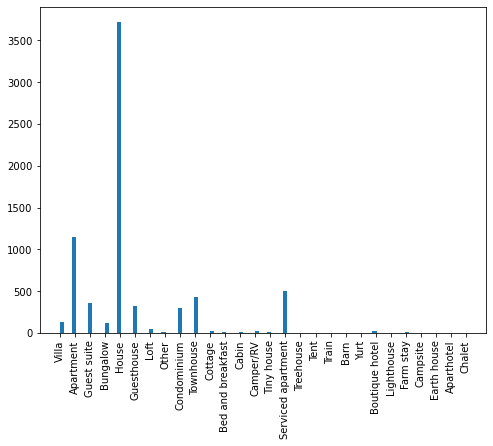

In [698]:
#Visualize proprty_type:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['property_type'], bins=100)

plt.xticks(rotation=90)
plt.show()

In [699]:
data['state'].unique()  # to drop


array(['CA', 'Ca', 'ca', nan, 'California '], dtype=object)

In [700]:
data_null = data.isnull().sum()

In [701]:
data_null.sort_values(ascending=False)

square_feet               7192
weekly_price              6647
monthly_price             6629
notes                     3529
access                    3117
                          ... 
maximum_minimum_nights       0
minimum_maximum_nights       0
maximum_maximum_nights       0
minimum_nights_avg_ntm       0
bed_type                     0
Length: 89, dtype: int64

In [702]:
data = data.drop(['square_feet', 'zipcode', 'state'], axis=1)


### Check the numerical and nominal data seperately


In [703]:
numeric_features = data.select_dtypes(include=['int64', 'float64'])
nominal_features = data.select_dtypes(include=['object'])

In [704]:
numeric_features.head()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,7054,5.0,5.0,37.43972,-122.15672,2,2.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,5,0,5,0,0.57
1,11464,42458,13.0,13.0,37.34342,-121.98829,1,1.0,NaN,1.0,...,10.0,10.0,9.0,9.0,9.0,12,12,0,0,0.08
2,17884,69023,2.0,2.0,37.38612,-122.07357,2,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,2,2,0,0,0.11
3,21373,7054,5.0,5.0,37.44001,-122.15667,1,2.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,5,0,5,0,2.17
4,37512,161741,2.0,2.0,37.30598,-121.84036,2,1.0,1.0,1.0,...,10.0,10.0,10.0,9.0,9.0,2,0,2,0,1.53


In [705]:
numeric_features.columns

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

In [706]:
(data['maximum_maximum_nights'] == data['minimum_maximum_nights']
 ).value_counts()


True     7178
False      43
dtype: int64

In [230]:
(data['host_listings_count'] == data['host_total_listings_count']
 ).value_counts()


True     7220
False       1
dtype: int64

In [707]:
numeric_features.isna().sum()

id                                                 0
host_id                                            0
host_listings_count                                1
host_total_listings_count                          1
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          1
bedrooms                                           6
beds                                              68
guests_included                                    0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                             0
maximum_nights_avg_ntm                        

In [708]:
nominal_features.head()

,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",...,$45.00,2 months ago,2020-05-30,2009-08-02,2019-01-12,"{""PALO ALTO""}",f,moderate,f,f
1,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,...,$10.00,5 months ago,2020-05-31,2014-06-15,2019-10-11,"{""SANTA CLARA""}",f,moderate,f,t
2,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,...,$0.00,4 weeks ago,2020-05-31,2018-11-20,2019-04-27,"{""Mountain View"","" CA""}",f,strict_14_with_grace_period,f,f
3,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,The family room has a flat panel tv and desk f...,The Stanford Shopping Center is 20 minutes wal...,"Kitchen, Laundry, Garden, Family Room with TV,...",We will see you everyday as we cook meals in t...,...,$50.00,3 weeks ago,2020-05-30,2010-05-28,2020-03-14,"{""PALO ALTO""}",f,moderate,f,f
4,2020-05-31,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,Please remember that you are in my home and re...,We have a bus stop right outside our community...,The kitchen and all that it offers. The laund...,We follow our guests lead when it comes to soc...,...,$0.00,23 months ago,2020-05-31,2010-08-01,2017-03-14,"{""SAN JOSE""}",f,moderate,t,t


In [709]:
nominal_features.columns

Index(['last_scraped', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'market',
       'smart_location', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_review', 'last_review',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [307]:
nominal_features.isna().sum()

last_scraped                           0
name                                   1
summary                              299
space                               1707
description                          238
neighborhood_overview               2677
notes                               3529
transit                             3085
access                              3117
interaction                         2968
house_rules                         2264
host_name                              1
host_since                             1
host_location                         23
host_about                          2334
host_response_time                  1807
host_response_rate                  1807
host_acceptance_rate                 714
host_is_superhost                      1
host_neighbourhood                  1181
host_verifications                     0
host_has_profile_pic                   1
host_identity_verified                 1
street                                 0
neighbourhood   

In [329]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [710]:
data['market'].unique()  # to drop


array(['South Bay, CA', 'Monterey Region', 'Other (Domestic)',
       'South Bay CA', nan], dtype=object)

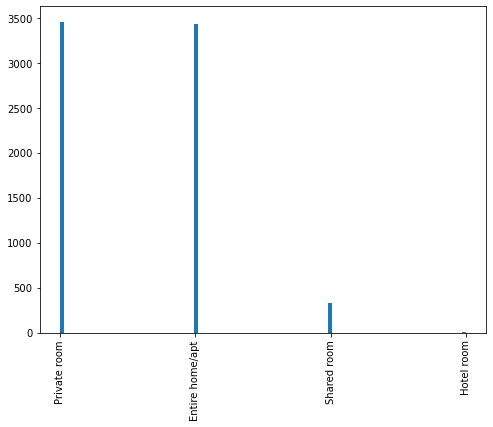

In [711]:
#Visualize room_type:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['room_type'], bins=100)

plt.xticks(rotation=90)
plt.show()

In [712]:
accomo_type = data['accommodates'].unique()
accomo_type.sort()
accomo_type

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

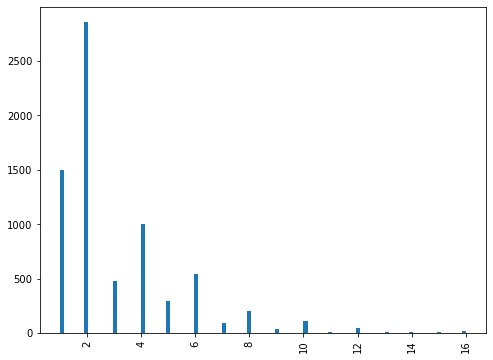

In [713]:
#Visualize accomodates:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['accommodates'], bins=100)

plt.xticks(rotation=90)
plt.show()

In [714]:
data['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [715]:
data['cancellation_policy'].unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_60'], dtype=object)

### Clean the city column


In [314]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Santa Clara County',
       'Sunnyvale ', 'Palo Alto ', 'Milpitas ', 'Los Gatos ', 'san jose',
       'Mountain View ', 'Danville ', nan, 'Campbell ', '洛斯阿尔托斯',
       'santa clara', 'Fremont', '圣何塞', 'Watsonville'], dtype=object)

In [315]:
data['city'] = data['city'].str.replace('圣何塞', 'San Jose')
data['city'] = data['city'].str.replace('san jose', 'San Jose')
data['city'] = data['city'].str.replace('洛斯阿尔托斯', 'Los Altos')
data['city'] = data['city'].str.replace('santa clara', 'Santa Clara')
data['city'] = data['city'].str.replace('Santa Clara County', 'Santa Clara')
data['city'].str.strip()

0           Palo Alto
1         Santa Clara
2       Mountain View
3           Palo Alto
4            San Jose
            ...      
7216         San Jose
7217      Santa Clara
7218        Sunnyvale
7219         San Jose
7220         San Jose
Name: city, Length: 7221, dtype: object

In [344]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Sunnyvale ', 'Palo Alto ',
       'Milpitas ', 'Los Gatos ', 'Mountain View ', 'Danville ', nan,
       'Campbell ', 'Fremont', 'Watsonville'], dtype=object)

In [716]:
data['city'].value_counts(ascending=False)

San Jose              3028
Palo Alto              788
Sunnyvale              764
Santa Clara            713
Mountain View          665
Cupertino              335
Milpitas               296
Los Gatos              133
Campbell               128
Los Altos               89
Saratoga                70
Morgan Hill             63
Los Altos Hills         53
Gilroy                  32
Monte Sereno            16
San Martin              15
Menlo Park               4
Palo Alto                4
Fremont                  3
San Jose                 3
Stanford                 3
Hollister                2
圣何塞                      2
Santa Clara County       1
Sunnyvale                1
Milpitas                 1
Los Gatos                1
san jose                 1
Mountain View            1
Danville                 1
Campbell                 1
洛斯阿尔托斯                   1
santa clara              1
Watsonville              1
Name: city, dtype: int64

### Find the unique values in each column


In [717]:
# find binary columns:
for col in data.columns:
    if data[col].nunique() == 2:
        print(col)

last_scraped
host_is_superhost
host_has_profile_pic
host_identity_verified
is_location_exact
calendar_last_scraped
instant_bookable
require_guest_profile_picture
require_guest_phone_verification


In [718]:
(data['host_is_superhost'] == data['host_identity_verified']).value_counts()

True     4229
False    2992
dtype: int64

In [719]:
(data['require_guest_profile_picture'] ==
 data['require_guest_phone_verification']).value_counts()


True     7083
False     138
dtype: int64

Drop the 'require_guest_profile_picture' later


In [720]:
for col, n in zip(data.columns, data.nunique()):
    if n < 10 and n > 1:
        print(col, n)


last_scraped 2
host_response_time 4
host_is_superhost 2
host_has_profile_pic 2
host_identity_verified 2
market 4
is_location_exact 2
room_type 4
bed_type 5
calendar_last_scraped 2
review_scores_accuracy 8
review_scores_cleanliness 8
review_scores_checkin 8
review_scores_communication 8
review_scores_location 7
review_scores_value 8
instant_bookable 2
cancellation_policy 4
require_guest_profile_picture 2
require_guest_phone_verification 2


### Clean the duplicated columns,drop the following columns

based on the analysis abvoe, we can drop the following columns:


In [721]:
data.drop([
    'host_id', 'last_scraped', 'market', 'require_guest_profile_picture',
    'minimum_maximum_nights', 'host_total_listings_count',
    'calendar_last_scraped'
],
          axis=1,
          inplace=True)

In [722]:
for col, n in zip(data.columns, data.nunique()):
    if n < 10 and n > 1:
        print(col, n)


host_response_time 4
host_is_superhost 2
host_has_profile_pic 2
host_identity_verified 2
is_location_exact 2
room_type 4
bed_type 5
review_scores_accuracy 8
review_scores_cleanliness 8
review_scores_checkin 8
review_scores_communication 8
review_scores_location 7
review_scores_value 8
instant_bookable 2
cancellation_policy 4
require_guest_phone_verification 2


is_location_exact ???


In [723]:
data['host_response_time'].value_counts()

within an hour        3993
within a few hours     862
within a day           411
a few days or more     148
Name: host_response_time, dtype: int64

### Create dummy variables for categorical features


In [724]:
data = pd.get_dummies(data,
                      columns=[
                          'host_is_superhost', 'host_identity_verified',
                          'instant_bookable', 'cancellation_policy',
                          'room_type'
                      ],
                      prefix=[
                          'Superhost', 'Host verified', 'Instantbook',
                          'Cancellation', 'Room type'
                      ],
                      dtype='int64')


In [725]:
data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,Instantbook_f,Instantbook_t,Cancellation_flexible,Cancellation_moderate,Cancellation_strict_14_with_grace_period,Cancellation_super_strict_60,Room type_Entire home/apt,Room type_Hotel room,Room type_Private room,Room type_Shared room
0,4952,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",...,1,0,0,1,0,0,0,0,1,0
1,11464,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,...,1,0,0,1,0,0,1,0,0,0
2,17884,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,...,1,0,0,0,1,0,1,0,0,0
3,21373,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,The family room has a flat panel tv and desk f...,The Stanford Shopping Center is 20 minutes wal...,"Kitchen, Laundry, Garden, Family Room with TV,...",We will see you everyday as we cook meals in t...,...,1,0,0,1,0,0,0,0,1,0
4,37512,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,Please remember that you are in my home and re...,We have a bus stop right outside our community...,The kitchen and all that it offers. The laund...,We follow our guests lead when it comes to soc...,...,1,0,0,1,0,0,0,0,1,0


### Transfer the unit of currency to float


In [726]:
price_list = [
    'weekly_price',
    'monthly_price',
    'price',
    'security_deposit',
    'cleaning_fee',
    'extra_people',
]

In [727]:
for p in price_list:
    print(p, data[p].isna().sum())


weekly_price 6647
monthly_price 6629
price 0
security_deposit 1457
cleaning_fee 800
extra_people 0


In [728]:
for p in price_list:
    data[p].fillna('$0.00', inplace=True)
    data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_60738/1242419390.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)


In [729]:
data[price_list].isna().sum()

weekly_price        0
monthly_price       0
price               0
security_deposit    0
cleaning_fee        0
extra_people        0
dtype: int64

In [761]:
data[price_list]

,weekly_price,monthly_price,price,security_deposit,cleaning_fee,extra_people
0,440.0,1428.0,90.0,0.0,35.0,45.0
1,0.0,2100.0,85.0,700.0,250.0,10.0
2,1400.0,2800.0,65.0,1000.0,0.0,0.0
3,600.0,2000.0,99.0,0.0,35.0,50.0
4,393.0,1386.0,52.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7216,0.0,0.0,49.0,500.0,100.0,50.0
7217,0.0,0.0,135.0,500.0,135.0,20.0
7218,0.0,0.0,85.0,0.0,150.0,25.0
7219,0.0,0.0,49.0,1000.0,150.0,10.0


In [730]:
numeric_features = data.select_dtypes(
    include=['int64', 'float64', 'float32', 'int32'])
nominal_features = data.select_dtypes(include=['object'])

In [731]:
numeric_features.head()

,id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,Instantbook_f,Instantbook_t,Cancellation_flexible,Cancellation_moderate,Cancellation_strict_14_with_grace_period,Cancellation_super_strict_60,Room type_Entire home/apt,Room type_Hotel room,Room type_Private room,Room type_Shared room
0,4952,5.0,37.43972,-122.15672,2,2.0,1.0,1.0,90.0,440.0,...,1,0,0,1,0,0,0,0,1,0
1,11464,13.0,37.34342,-121.98829,1,1.0,NaN,1.0,85.0,0.0,...,1,0,0,1,0,0,1,0,0,0
2,17884,2.0,37.38612,-122.07357,2,1.0,1.0,1.0,65.0,1400.0,...,1,0,0,0,1,0,1,0,0,0
3,21373,5.0,37.44001,-122.15667,1,2.0,1.0,1.0,99.0,600.0,...,1,0,0,1,0,0,0,0,1,0
4,37512,2.0,37.30598,-121.84036,2,1.0,1.0,1.0,52.0,393.0,...,1,0,0,1,0,0,0,0,1,0


In [732]:
nominal_features.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,smart_location,is_location_exact,property_type,bed_type,amenities,calendar_updated,first_review,last_review,jurisdiction_names,require_guest_phone_verification
0,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,...,"Palo Alto, CA",t,Villa,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",2 months ago,2009-08-02,2019-01-12,"{""PALO ALTO""}",f
1,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,...,"Santa Clara, CA",t,Apartment,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5 months ago,2014-06-15,2019-10-11,"{""SANTA CLARA""}",t
2,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,"This is a quiet neighborhood, and the suite sh...",...,"Mountain View, CA",t,Guest suite,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",4 weeks ago,2018-11-20,2019-04-27,"{""Mountain View"","" CA""}",f
3,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,The family room has a flat panel tv and desk f...,The Stanford Shopping Center is 20 minutes wal...,"Kitchen, Laundry, Garden, Family Room with TV,...",We will see you everyday as we cook meals in t...,No shoes in the house beyond hall or laundry. ...,...,"Palo Alto, CA",t,Villa,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",3 weeks ago,2010-05-28,2020-03-14,"{""PALO ALTO""}",f
4,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,Please remember that you are in my home and re...,We have a bus stop right outside our community...,The kitchen and all that it offers. The laund...,We follow our guests lead when it comes to soc...,No drunk and disorderly conduct please. You m...,...,"San Jose, CA",t,Bungalow,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",23 months ago,2010-08-01,2017-03-14,"{""SAN JOSE""}",t


### Amenities hot words analysis


In [733]:
from collections import Counter

results = Counter()

In [734]:
amenities = data['amenities']

In [735]:
amenities.str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7216    None
7217    None
7218    None
7219    None
7220    None
Name: amenities, Length: 7221, dtype: object

In [736]:
# results

In [737]:
sub_df = pd.DataFrame(results.most_common(50), columns=['amenities', 'count'])

In [738]:
sub_df['ratio'] = round(sub_df['count'] / len(amenities), 4)


In [739]:
sub_df.sort_values(by=['count'], ascending=False)

,amenities,count,ratio
0,Wifi,7071,0.9792
1,Essentials,6904,0.9561
2,Heating,6824,0.9450
3,Smoke alarm,6794,0.9409
4,Hangers,6480,0.8974
5,Shampoo,6271,0.8684
6,Carbon monoxide alarm,6178,0.8556
7,Laptop-friendly workspace,5998,0.8306
8,Hair dryer,5997,0.8305
9,Kitchen,5890,0.8157


### Location visualization:

In [781]:
data['latitude'].describe()

count    7221.000000
mean       37.352285
std         0.064819
min        36.965600
25%        37.319770
50%        37.358260
75%        37.398250
max        37.462980
Name: latitude, dtype: float64

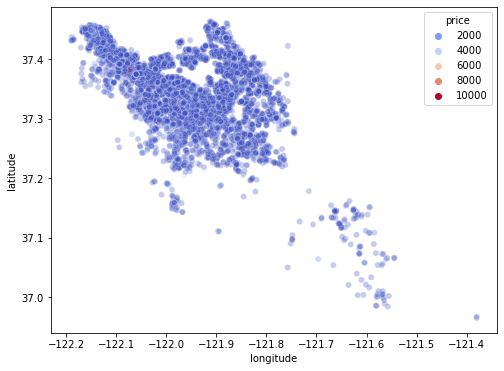

In [783]:
_,ax = plt.subplots(figsize=(8, 6))

g = sns.scatterplot(x=data['longitude'],
                    y=data['latitude'],
                    data=data,
                    ax=ax,
                    alpha=0.3,
                    hue='price',
                    palette='coolwarm')

plt.show()

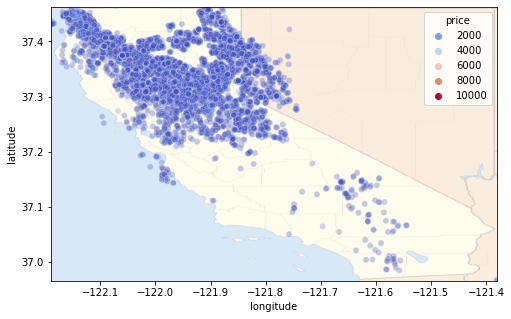

In [785]:
# Now intro Cali map jpeg
import matplotlib.image as mpimg

california_img = mpimg.imread("./california.png")

_, ax = plt.subplots(figsize=(8, 6))

sns.set_context(font_scale=2)

g = sns.scatterplot(x=data['longitude'],
                    y=data['latitude'],
                    data=data,
                    ax=ax,
                    alpha=0.3,
                    hue='price',
                    palette='coolwarm')

# Now for cal map:
ax.imshow(
    california_img,
    alpha=0.4,
    extent=[data['longitude'].min(), data['longitude'].max(),data['latitude'].min(), data['latitude'].max()],
    cmap=plt.get_cmap("jet"),
)

plt.show()


In [ ]:
# valid_locations = data.dropna(subset=['latitude', 'longitude'],how='any')

### What we got now:

Data cleaning

- host ID to drop
- whcih col to nomalization or standardization?
---

- Neighbors does not match the neighbors in data
  - sub data by region?



## Fusion with reviews


In [741]:
reviews = pd.read_csv('./data/reviews.csv')
print(reviews.shape)
reviews.head()

(212513, 2)


,listing_id,date
0,4952,2009-08-02
1,4952,2009-09-04
2,4952,2009-10-16
3,4952,2009-12-10
4,4952,2010-06-08


In [742]:
rev_row = reviews['listing_id'].unique()

In [743]:
data_rev = data.loc[data['id'].isin(rev_row)]
data_rev.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,Instantbook_f,Instantbook_t,Cancellation_flexible,Cancellation_moderate,Cancellation_strict_14_with_grace_period,Cancellation_super_strict_60,Room type_Entire home/apt,Room type_Hotel room,Room type_Private room,Room type_Shared room
0,4952,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",...,1,0,0,1,0,0,0,0,1,0
1,11464,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,...,1,0,0,1,0,0,1,0,0,0
2,17884,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,...,1,0,0,0,1,0,1,0,0,0
3,21373,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,The family room has a flat panel tv and desk f...,The Stanford Shopping Center is 20 minutes wal...,"Kitchen, Laundry, Garden, Family Room with TV,...",We will see you everyday as we cook meals in t...,...,1,0,0,1,0,0,0,0,1,0
4,37512,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,Please remember that you are in my home and re...,We have a bus stop right outside our community...,The kitchen and all that it offers. The laund...,We follow our guests lead when it comes to soc...,...,1,0,0,1,0,0,0,0,1,0


In [744]:
data_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5734 entries, 0 to 7214
Data columns (total 88 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5734 non-null   int64  
 1   name                                          5734 non-null   object 
 2   summary                                       5563 non-null   object 
 3   space                                         4571 non-null   object 
 4   description                                   5606 non-null   object 
 5   neighborhood_overview                         3884 non-null   object 
 6   notes                                         3191 non-null   object 
 7   transit                                       3618 non-null   object 
 8   access                                        3642 non-null   object 
 9   interaction                                   3640 non-null   o

In [745]:
data_rev.describe(include='all')

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,Instantbook_f,Instantbook_t,Cancellation_flexible,Cancellation_moderate,Cancellation_strict_14_with_grace_period,Cancellation_super_strict_60,Room type_Entire home/apt,Room type_Hotel room,Room type_Private room,Room type_Shared room
count,5.734000e+03,5734,5563,4571,5606,3884,3191,3618,3642,3640,...,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000
unique,NaN,5615,4920,3791,5224,3066,2479,2834,3047,2780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,TRIBE ❤️ Deep Cleaned 2BR @ Great Mall Milpitas,The HackerHome Network New to the Valley? Tran...,"At Zeus, we focus exclusively on 30 day+ stays...","Dorm-style house in Silicon Valley. No-host, 5...",*Area Highlights* -Located in the Heart of the...,Parking is not included with your stay. Parkin...,This Flat Location is Uber/Lyft Accessible & C...,"• All utilities are included, including gas, e...",We're available 24/7 via Text | Email | Emerge...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21,44,242,20,28,41,59,26,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.461825e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.568887,0.431113,0.343739,0.349145,0.306941,0.000174,0.471573,0.000349,0.485002,0.043076
std,1.209688e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.495275,0.495275,0.474997,0.476742,0.461265,0.013206,0.499235,0.018674,0.499819,0.203047
min,4.952000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.489002e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.598272e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.500704e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [746]:
counts = reviews['listing_id'].value_counts()


In [747]:
counts.head()

7476637     489
52786       478
10814836    445
19641513    429
13828514    427
Name: listing_id, dtype: int64

## Fusion with neighborhood data


In [748]:
neighbors = pd.read_csv('./data/neighbourhoods.csv')
print(neighbors.shape)
neighbors.head()

(16, 2)


,neighbourhood_group,neighbourhood
0,NaN,Campbell
1,NaN,Cupertino
2,NaN,Gilroy
3,NaN,Los Altos
4,NaN,Los Altos Hills


In [749]:
data_neighbor = data['neighbourhood'].unique().tolist()
neighbors_hood = neighbors['neighbourhood'].unique().tolist()

In [750]:
same_locations = []

for neighbor in neighbors_hood:
    if neighbor in data_neighbor:
        same_locations.append(neighbor)

In [751]:
same_locations

['Campbell',
 'Cupertino',
 'Los Altos',
 'Los Altos Hills',
 'Mountain View',
 'Palo Alto',
 'Santa Clara',
 'Sunnyvale']

In [752]:
data_neighbor

['Palo Alto',
 'Santa Clara',
 'Mountain View',
 'South San Jose',
 'Cupertino',
 'Sunnyvale',
 'Downtown',
 'Campbell',
 'West Valley',
 'Edenvale',
 nan,
 'Willow Glen',
 'Central San Jose',
 'Los Altos',
 'Berryessa',
 'Cory',
 'College Park',
 'Alum Rock',
 'Cambrian/Pioneer',
 'North San Jose',
 'Los Altos Hills',
 'Burbank/Del Monte',
 'Evergreen',
 'Newhall/Sherwood',
 'Shasta/Hanchett Park',
 'Rose Garden',
 'Five Wounds/Brookwood Terrace',
 'Naglee Park',
 'Forest/Pruneridge',
 'Alviso',
 'Japantown',
 'Stanford',
 'Delmas Park',
 'Chapman/Morse',
 'Menlo Park',
 'Autumn/Montgomery',
 'Vermont/McKendrie']

In [753]:
neighbors_hood

['Campbell',
 'Cupertino',
 'Gilroy',
 'Los Altos',
 'Los Altos Hills',
 'Los Gatos',
 'Milpitas',
 'Monte Sereno',
 'Morgan Hill',
 'Mountain View',
 'Palo Alto',
 'San Jose',
 'Santa Clara',
 'Saratoga',
 'Sunnyvale',
 'Unincorporated Areas']

## ideas list

### methdology for this large scale data?

### which cols we need

- e.g.

  id
  name
  host_id
  host_name

  neighbourhood_group
  neighbourhood

  latitude
  longitude

  room_type

  price

  minimum_nights
  number_of_reviews

  reviews_per_month
  calculated_host_listings_count
  availability_365

### What to compare

- Room Type vs Price
- Price/log price Distribution Plot

### pipleline?

## Codes for refering

- [amenities refer](https://www.kaggle.com/brittabettendorf/predicting-prices-xgboost-feature-engineering)
- [word cloud /weighted words /sentimental analsys / topic modeling](https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data)

### nextweek

modeling for price prediction
